# Naive Bayes
<br>
1. Navie Bayes models are simple supervised classification Algorithm based on Bayes' Theorem  and suitable for very high dimensional datasets.
<br>

2. **Bayes Theorem:** <br>
  Consider two events, A and B where $P(B)\ne 0$. Then, 
\begin{equation*}
P(A |B)=\frac{P(B| A)P(A)}{P(B)}
\end{equation*}

3. Similarly in classification Let Classes be  $C_i$ 
<br>Probability that the given features belong to class $C_i$ is ,
\begin{equation*}
P(C_i |features)=\frac{P(features| C_i)P(C_i)}{P(features)}
\end{equation*}
<br>
4. Here we assume independence between each pair of features.
<br>
5. MAP(Maximum A posterior) rule  for decison making.<br>
Consider 2 classes , $C_1, C_2$. Then 
  Features belong to class $C_1$ if \begin{equation*}
P(C_1 |features)>P(C_2 |features) \end{equation*} 
    <br>else
belongs to class $C_2$



6. We need a generative model to compute P(features| C) for each class.
7. Based on model Naive Bayes is classified as
    -  Bernoulli Naive Bayes
    -  Gaussian Naive Bayes
    -  Multinomial Naive Bayes



# Bernoulli Naive Bayes: 

    - Used when data is binary
    - Stores the counts ;whether the feature is present or not for each class

In [2]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [3]:
X=np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0]])  #four data point with four features
Y=np.array([1,2,1,2]) # 2 classes 0 and 1
#print the dataset
print(X)
print(Y)

[[0 1 0 1]
 [1 0 1 1]
 [0 0 0 1]
 [1 0 1 0]]
[1 2 1 2]


## Call bernoulli NB and fit the data

In [4]:
#call bernoulli NB and fit the data
bnb = BernoulliNB().fit(X,Y)

## Predict test data

In [5]:
test=np.array([[1,1,0,1]])
print(test)
#predict
pred = bnb.predict(test)
print(pred)

[[1 1 0 1]]
[1]


## Gaussian Naive Bayes:
    - Suitable when the features are continuous
    - Stores the average value and standard deviation of each features for each class.
### Pseudo code:
    Step1:Import necessary libraies
    Step2:Generate dataset
    Step3: Visualize the Gaussian NB based with contour plots.
    Step4:Fit dataset to Gaussian NB
    Step5:Generare test data and predict
    Step6: Calculate the posterior probabilites of label
    Step7: Visualize the data points
    

#### Step1:Import necessary libraies


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB


#### Step2:Generate dataset


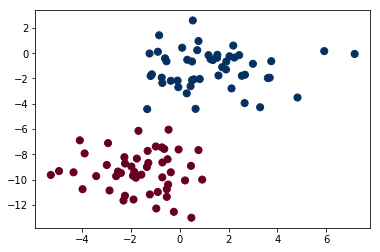

In [7]:
X, y = make_blobs(100,2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y,s=50, cmap = 'RdBu')

#### Step3 :Visualize the Gaussian NB based with contour plots.

[(-15, 5), (-8, 8)]

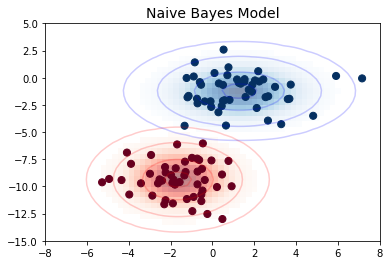

In [8]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)


#### Step4:Fit dataset to Gaussian NB


In [9]:
# Call gnb and fit the data
gnb = GaussianNB().fit(X,y)

#### Step5:Generare test data and predict


In [10]:
new_data=np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * new_data.rand(2000, 2)
#predict Xnew
ynew = gnb.predict(Xnew)

#### Step6: Calculate the posterior probabilites of label


In [11]:
# Compute probabilities and print
yprob = gnb.predict_proba(Xnew[1:2])
print(yprob)

[[8.05934584e-04 9.99194065e-01]]


####     Step7: Visualize the data points and boundary


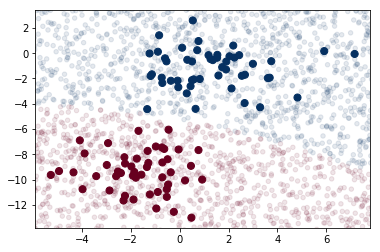

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

## Gaussian NB for iris dataset

    -Perform Gaussian NB classification on Iris dataset. Find accuaracy and computation time.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()
import numpy as np
import time
iris_data=load_iris()
Xtrain,Xtest,ytrain,ytest = train_test_split(iris_data['data'], iris_data['target'], random_state=1)
gnb_model = GaussianNB().fit(Xtrain,ytrain)
start=time.time()*1000
prediction = gnb_model.predict(Xtest)
end = time.time()*1000
print("Test score:{:.2f}".format(accuracy_score(ytest,prediction)))
print("Computation time in milli seconds : {:.2f}".format(end-start))

Test score:0.97
Computation time in milli seconds : 0.69


## Claculate computation time of KNN for iris data for predicting the data point, 
    X_new = np.array([[5, 2.9, 1, 0.2]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris_data=load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=1)

neighbors_settings = range(1, 11)
# computation time of KNN for iris data for predicting the data point
X_new = np.array([[5, 2.9, 1, 0.2]])
computation_time_knn = []
for n_neighbors in neighbors_settings:
    # build the model    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    start = time.time()*1000
    clf.predict(X_new)
    end = time.time()*1000
    # record computation time
    computation_time_knn.append(end-start)
print("Computation time of KNN in milliseconds for 1 to 10 neighbors : \n", computation_time_knn)

Computation time of KNN in milliseconds for 1 to 10 neighbors : 
 [0.724365234375, 0.529296875, 0.51611328125, 0.506103515625, 0.514404296875, 0.49658203125, 0.545166015625, 0.661376953125, 0.5078125, 0.58642578125]


## Exercise
Compare the accuracy of KNN and Gaussian NB when using iris data set

In [15]:
training_accuracy = [] 
test_accuracy = []
computation_time_knn = []
neighbor_values = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    neighbor_values.append(n_neighbors)
    clf.fit(x_train,y_train)
    start = time.time()*1000
    clf.predict(x_test)
    end = time.time()*1000
    # record training set accuracy    
    training_accuracy.append(clf.score(x_train,y_train))    
    # record generalization accuracy    
    test_accuracy.append(clf.score(x_test,y_test))
    # record computation time
    computation_time_knn.append(end-start)
gnb_model = GaussianNB().fit(x_train,y_train)
prediction = gnb_model.predict(Xtest)
computation_time_gnb = end-start
accuracy_gnb = accuracy_score(y_test,prediction)

# Accuracy of KNN and GNB
print("Neighbor settings",neighbor_values)
print("Accuracy of KNN",test_accuracy)
print("Accuracy of Gaussian NB",accuracy_gnb)

Neighbor settings [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Accuracy of KNN [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9736842105263158, 1.0, 0.9736842105263158, 0.9736842105263158]
Accuracy of Gaussian NB 0.9736842105263158


## Exercise:
        Implement Gaussian NB on Cancer dataset discussed in previous KNN classification and compute the accuracy.
        Split the data into 80% for training and 20% for testing.

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
X = cancer.data
y = cancer.target

# Use the same variable names as the previous example wherever required
# Split the Cancer dataset into a training and a test set
# Set the parameters random_state = 66 and stratify = y

[x_train,x_test,y_train,y_test] = train_test_split(X,y,random_state=66,stratify=y,train_size=0.8)

gnb_model = GaussianNB().fit(x_train,y_train)
prediction = gnb_model.predict(x_test)
print("Test score:{:.2f}".format(accuracy_score(y_test,prediction)))

Test score:0.93


/home/meenu/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Multinomial Naive Bayes
    Suitable when the features are discrete usually for count data
    Popular for text classification
    Stores average value of each feature for each class
### Pseudocode: 
       Step1: Import dataset and learn the targets 
       Step2: Choose any 3 targets and download the test and train data
       Step3: Convet strings into vector of numbers using TF-IDF Vectorizer
       Step4: Import and use pipeline to attach vector with NB.
       Step5: Fit the training data to the model.
       Step6: Predict the labels of the test data.
       Step7: Write a user defined function to return prediction for single string.
       
       

#### Step1: Import dataset and learn the targets 

In [17]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

####  Step2: Choose any 3 targets and download the test and train data

In [18]:
categories = [ 'soc.religion.christian', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])


From: steinly@topaz.ucsc.edu (Steinn Sigurdsson)
Subject: Re: Gamma Ray Bursters.  WHere  are they.
Organization: Lick Observatory/UCO
Lines: 56
NNTP-Posting-Host: topaz.ucsc.edu
In-reply-to: prb@access.digex.com's message of 23 Apr 1993 23:58:19 -0400

In article <1radsr$att@access.digex.net> prb@access.digex.com (Pat) writes:

     What  evidence  indicates that Gamma Ray bursters are very far away?

Their distribution is very isotropic and the intensity distribution,
crudely speaking, indicates we're seeing an edge to the distribution.

   Given the enormous  power,  i was just wondering,  what if they are
   quantum  black holes or something  like that  fairly close by?

   Why would they have to be at  galactic ranges?   

Now, in the good old days before GRO data, it was thought the
gamma bursters were neutron stars in the galaxy, it was expected that
GRO would confirm this by either showing they were a local population
(within a few hundred light years) or that they were in the 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train.data)
print(vectors.shape)

(1776, 31121)


####  Step4: Import and use pipeline to attach vector with NB.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

####  Step5: Fit the training data to the model

In [21]:
model.fit(train.data,train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

 ####  Step6: Predict the labels of the test data.

In [40]:
labels=model.predict(test.data)

####  Step7: Write a user defined function to return prediction for single string.

In [27]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
predict_category('determine screen resolution')

'comp.graphics'

## Exercise:  
    Include more than 5 targets and predict the categories.

In [55]:
categories_new = [ 'soc.religion.christian', 'sci.space','comp.graphics', 'rec.motorcycles', 'rec.sport.hockey', 'talk.politics.misc']
train_new = fetch_20newsgroups(subset='train', categories=categories_new)
test_new = fetch_20newsgroups(subset='test', categories=categories_new)
vectors_new = vectorizer.fit_transform(train_new.data)
print(vectors_new.shape)
model_new = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_new.fit(train_new.data,train_new.target)

(3439, 46554)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [78]:
def predict_category_new(s, train=train_new, model=model_new):
    pred = model.predict([s])
    return train.target_names[pred[0]]

print(predict_category_new('determine screen resolution'))
print(predict_category_new('God is great'))
print(predict_category_new('Aliens are invading Earth'))
print(predict_category_new('Honda manufactures good bikes'))
print(predict_category_new('Player is calling for a substitute'))
print(predict_category_new('US Elections 2016 witnessed the best President so far'))

comp.graphics
soc.religion.christian
sci.space
rec.motorcycles
rec.sport.hockey
talk.politics.misc


### Reference: 
    Jake VanderPlas, Python Data Science Handbook Essential Tools for Working with Data, O'Reilly Media, Inc.
